In [1]:
import pandas as pd
df = pd.read_csv("dataset_kualitas_kopi.csv")
df

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
0,71.676050,4.505419,Honey,Buruk
1,89.899105,4.777716,Honey,Buruk
2,101.782740,5.987926,Washed,Sedang
3,112.958351,5.145615,Natural,Baik
4,68.571363,4.934300,Honey,Buruk
...,...,...,...,...
295,105.346259,5.511636,Washed,Sedang
296,114.917455,5.150439,Natural,Baik
297,99.558838,5.612135,Washed,Sedang
298,88.621531,4.803087,Honey,Buruk


In [2]:
df.shape

(300, 4)

In [3]:
df.columns

Index(['Kadar Kafein', 'Tingkat Keasaman', 'Jenis Proses', 'Kualitas Kopi'], dtype='object')

In [5]:
df.dtypes

Kadar Kafein        float64
Tingkat Keasaman    float64
Jenis Proses         object
Kualitas Kopi        object
dtype: object

In [6]:
df.info

<bound method DataFrame.info of      Kadar Kafein  Tingkat Keasaman Jenis Proses Kualitas Kopi
0       71.676050          4.505419        Honey         Buruk
1       89.899105          4.777716        Honey         Buruk
2      101.782740          5.987926       Washed        Sedang
3      112.958351          5.145615      Natural          Baik
4       68.571363          4.934300        Honey         Buruk
..            ...               ...          ...           ...
295    105.346259          5.511636       Washed        Sedang
296    114.917455          5.150439      Natural          Baik
297     99.558838          5.612135       Washed        Sedang
298     88.621531          4.803087        Honey         Buruk
299     98.192872          5.504599       Washed        Sedang

[300 rows x 4 columns]>

In [7]:
df.describe()

,Kadar Kafein,Tingkat Keasaman
count,300.000000,300.000000
mean,94.880478,5.255010
std,18.612343,0.423348
min,60.340609,4.505419
25%,80.885090,4.912739
50%,96.469407,5.249464
75%,108.570401,5.622462
max,129.569514,5.995027


In [8]:
df.head()

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
0,71.676050,4.505419,Honey,Buruk
1,89.899105,4.777716,Honey,Buruk
2,101.782740,5.987926,Washed,Sedang
3,112.958351,5.145615,Natural,Baik
4,68.571363,4.934300,Honey,Buruk


In [9]:
df.tail()

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
295,105.346259,5.511636,Washed,Sedang
296,114.917455,5.150439,Natural,Baik
297,99.558838,5.612135,Washed,Sedang
298,88.621531,4.803087,Honey,Buruk
299,98.192872,5.504599,Washed,Sedang


In [11]:
df["Jenis Proses"].value_counts()

Jenis Proses
Natural    103
Honey      101
Washed      96
Name: count, dtype: int64

In [13]:
df["Kualitas Kopi"].value_counts()

Kualitas Kopi
Baik      103
Buruk      99
Sedang     98
Name: count, dtype: int64

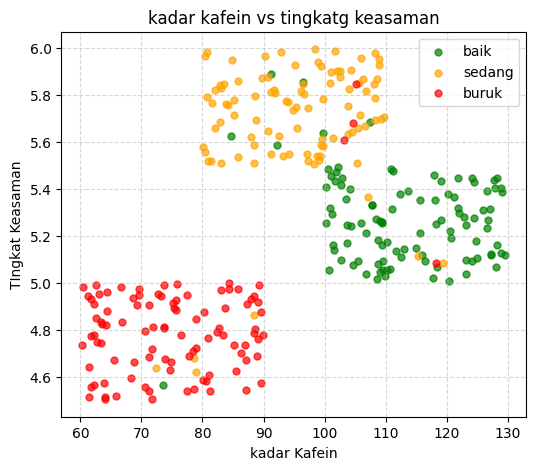

In [40]:
import matplotlib.pyplot as plt
baik = df[df["Kualitas Kopi"]=="Baik"]
sedang = df[df["Kualitas Kopi"]=="Sedang"]
buruk = df[df["Kualitas Kopi"]=="Buruk"]

plt.figure(figsize=(6,5))
plt.scatter(baik["Kadar Kafein"], baik["Tingkat Keasaman"], s=25, color="green", alpha=0.7, label="baik", marker="o")
plt.scatter(sedang["Kadar Kafein"], sedang["Tingkat Keasaman"], s=25, color="orange", alpha=0.7, label="sedang", marker="o")
plt.scatter(buruk["Kadar Kafein"], buruk["Tingkat Keasaman"], s=25, color="red", alpha=0.7, label="buruk", marker="o")

plt.xlabel("kadar Kafein")
plt.ylabel("TIngkat Keasaman")
plt.title("kadar kafein vs tingkatg keasaman")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



# Features and target
X = df[["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"]]
y = df["Kualitas Kopi"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_columns = ["Kadar Kafein", "Tingkat Keasaman"]
categorical_columns = ["Jenis Proses"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns),
    ]
)

model = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", LogisticRegression())
])

# Fit and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

accuracy : 0.9666666666666667

Classification Report :
               precision    recall  f1-score   support

        Baik       1.00      0.94      0.97        18
       Buruk       0.96      1.00      0.98        26
      Sedang       0.94      0.94      0.94        16

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60


Confusion Matrix :
 [[17  0  1]
 [ 0 26  0]
 [ 0  1 15]]


In [79]:
data_baru = pd.DataFrame([[110, 5, "Honey"]], columns=["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"])
prediksi = model.predict(data_baru)[0]
presentase = max(model.predict_proba(data_baru)[0])
print(f"prediksi {prediksi} dengan keyakinan {presentase *100:.2f}%")

prediksi Baik dengan keyakinan 66.49%


In [80]:
data_baru = pd.DataFrame([[110, 5, "Natural"]], columns=["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"])
prediksi = model.predict(data_baru)[0]
presentase = max(model.predict_proba(data_baru)[0])
print(f"prediksi {prediksi} dengan keyakinan {presentase *100:.2f}%")

prediksi Baik dengan keyakinan 91.67%


In [81]:
data_baru = pd.DataFrame([[110, 5, "Washed"]], columns=["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"])
prediksi = model.predict(data_baru)[0]
presentase = max(model.predict_proba(data_baru)[0])
print(f"prediksi {prediksi} dengan keyakinan {presentase *100:.2f}%")

prediksi Baik dengan keyakinan 69.03%


In [82]:
import joblib
joblib.dump(model, "model_klasifikasi_kopi.joblib")


['model_klasifikasi_kopi.joblib']